# PID Controller Tuning

## 1.Empirical Method

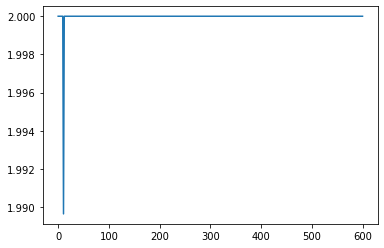

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def fopdt(t, K, tau, theta):
    return K*(1-np.exp((-(t-theta)/tau))*(t>theta))

t = np.linspace(0,600,400)

y= fopdt(t,2,.1,10)
plt.plot(t,y)

### PID reference implementation

In [5]:
def PID(Kp, Ki, Kd, MV_bar=0, beta=1, gamma=0):
    #initialize stored data
    t_prev = -100
    P = 0
    I = 0
    D = 0
    S = 0 
    N = 5
    
    #initial control
    MV = MV_bar
    
    while True:
        # yield MV, wait for new t, SP, PV, TR
        data = yield MV
        
        # see if a tracking data is being supplied
        if len(data) < 4:
            t, SP, PV = data
        else:
            t, SP, PV, TR = data
            I = TR - MV_bar - P - D
        # PID calculations
        P = Kp*(beta*SP-PV)
        I +=  Ki*(SP-PV)*(t-t_prev)
        MV = MV_bar + P + I + D
        
        # Constrain MV to range 0 to 100 for antu-reset windup
        MV = 0 if MV < 0 else 100 if MV > 100 else MV
        I = MV - MV_bar - P - D
        
        # update stored datat for nest iteration
        S += D*(t-t_prev) 
        t_prev = t